<a href="https://colab.research.google.com/github/Ansarabbas4200/Deep_Learning/blob/main/EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [72]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#### Load and Preprocess Data

In [73]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to (28, 28, 1) for 1 channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#### Build CNN Model

In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#### Compile Model

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train Model

In [76]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 77s 129ms/step - loss: 0.2165 - accuracy: 0.9356 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 2/10
422/422 [==============================] - 51s 120ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0428 - val_accuracy: 0.9878
Epoch 3/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 4/10
422/422 [==============================] - 49s 117ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0324 - val_accuracy: 0.9903
Epoch 5/10
422/422 [==============================] - 58s 138ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0367 - val_accuracy: 0.9905
Epoch 6/10
422/422 [==============================] - 51s 122ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0368 - val_ac

In [77]:
# Make predictions on test data
predictions = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step


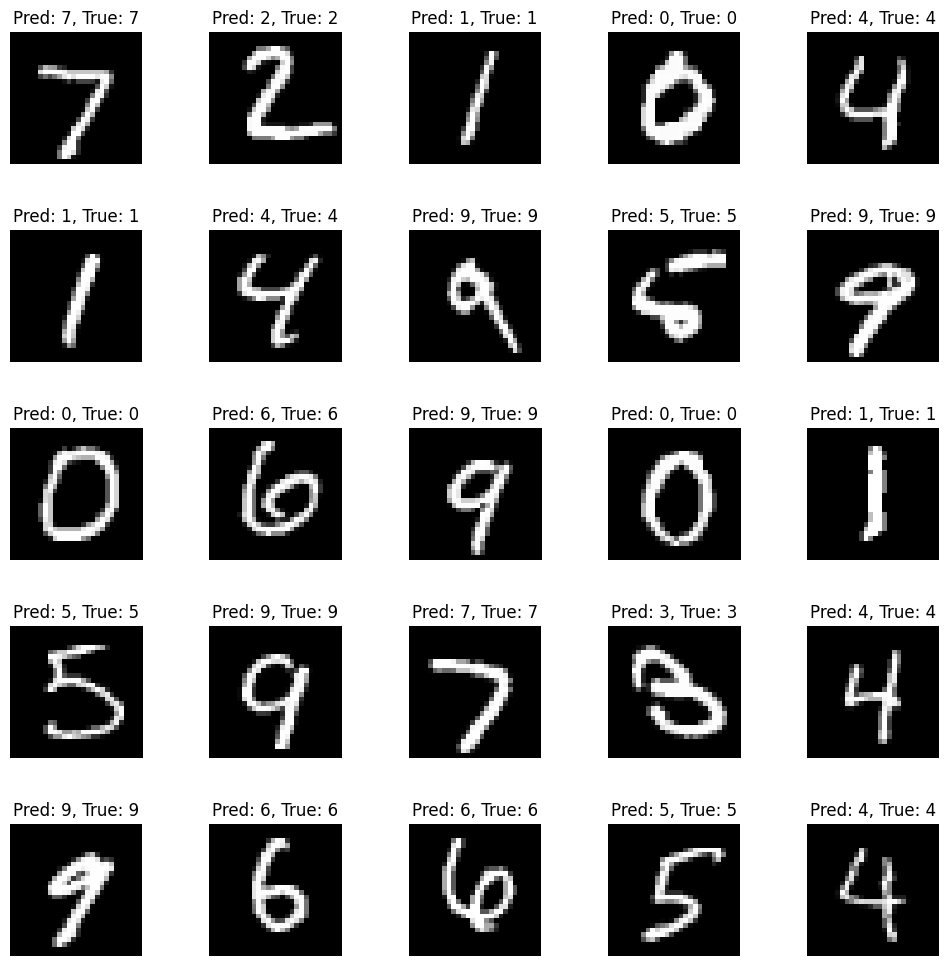

In [78]:
# Visualize some sample predictions
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(x_test[i].squeeze(), cmap='gray')
    axes[i].axis('off')
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    axes[i].set_title(f"Pred: {pred_label}, True: {true_label}")
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [79]:
# Save the weights of the MNIST model
mnist_model.save_weights('mnist_model_weights.h5')

##  To use the pre-trained weights from the previous MNIST model for transfer learning on the EMNIST dataset 


In [80]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from emnist import extract_training_samples, extract_test_samples

#### Load the pre-trained MNIST model weights 

In [82]:
# Load pre-trained MNIST model
mnist_model = Sequential()
mnist_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model.add(MaxPooling2D((2, 2)))
mnist_model.add(Conv2D(64, (3, 3), activation='relu'))
mnist_model.add(MaxPooling2D((2, 2)))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='relu'))
mnist_model.load_weights('mnist_model_weights.h5')  # Load pre-trained weights
mnist_model.layers.pop()  # Remove the last output layer

In [83]:
# Add new output layer for EMNIST with 47 classes
emnist_model = Sequential()
for layer in mnist_model.layers:
    emnist_model.add(layer)
emnist_model.add(Dense(47, activation='softmax'))  # New output layer for 47 classes

In [84]:
# Freeze the weights of the pre-trained layers
for layer in emnist_model.layers[:-1]:
    layer.trainable = False


In [85]:
# Load and preprocess the EMNIST dataset
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 47)
y_test = to_categorical(y_test, 47)

In [86]:
# Compile the model
emnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
# Compile the EMNIST model
emnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
# Train the model
history = emnist_model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
878/878 [==============================] - 54s 61ms/step - loss: 2.9170 - accuracy: 0.4325 - val_loss: 2.4452 - val_accuracy: 0.5357
Epoch 2/10
878/878 [==============================] - 34s 38ms/step - loss: 2.1835 - accuracy: 0.5622 - val_loss: 1.9788 - val_accuracy: 0.5776
Epoch 3/10
878/878 [==============================] - 31s 35ms/step - loss: 1.8346 - accuracy: 0.5897 - val_loss: 1.7206 - val_accuracy: 0.5982
Epoch 4/10
878/878 [==============================] - 34s 38ms/step - loss: 1.6298 - accuracy: 0.6094 - val_loss: 1.5589 - val_accuracy: 0.6164
Epoch 5/10
878/878 [==============================] - 34s 39ms/step - loss: 1.4956 - accuracy: 0.6249 - val_loss: 1.4486 - val_accuracy: 0.6313
Epoch 6/10
878/878 [==============================] - 35s 39ms/step - loss: 1.4009 - accuracy: 0.6382 - val_loss: 1.3672 - val_accuracy: 0.6404
Epoch 7/10
878/878 [==============================] - 31s 36ms/step - loss: 1.3297 - accuracy: 0.6483 - val_loss: 1.3055 - val_accuracy:

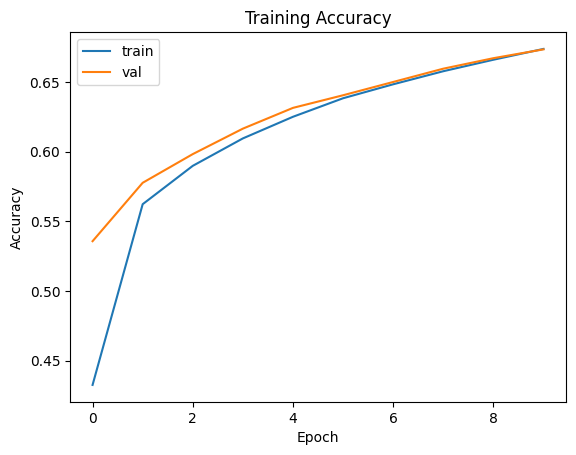

In [89]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


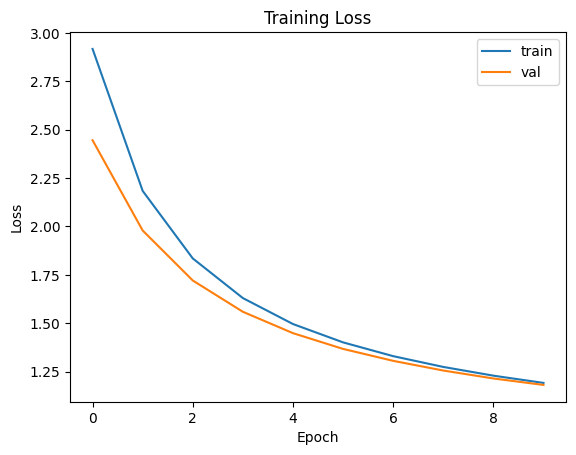

In [90]:
# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

650/650 [==============================] - 6s 10ms/step


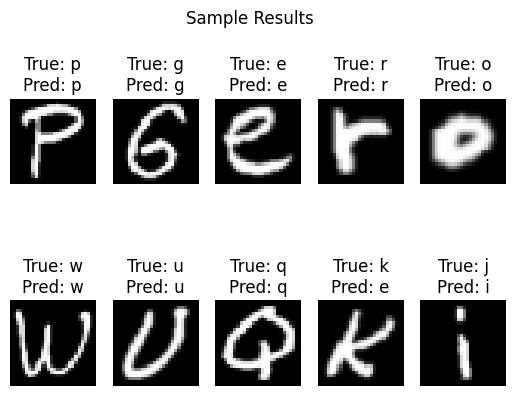

In [91]:
# Make predictions on test set
y_pred = emnist_model.predict(x_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Randomly select some samples to visualize
num_samples = 10
sample_indices = np.random.randint(0, len(x_test), num_samples)

# Visualize sample results
for i, sample_idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[sample_idx].squeeze(), cmap='gray')
    plt.title('True: {}\nPred: {}'.format(chr(y_test_labels[sample_idx] + 96), chr(y_pred_labels[sample_idx] + 96)))
    plt.axis('off')
plt.suptitle('Sample Results')
plt.show()

## Our pretrained model's weights over mnist digit dataset perform transfer learning over emnist digit very well